In [2]:
import sys 
sys.path.append('/home/kelcey/hera/Washington/uwchamp2017')
#import importlib.util
#spec = importlib.util.spec_from_file_location("spec_calcs", "/home/kelcey/hera/Washington/uwchamp2017/clusterer.py")

#spec_calcs = importlib.util.module_from_spec(spec)
#spec.loader.exec_module(spec_calcs)
import clusterer as clst
import fits_functions as ff


conda config --add channels conda-forge
conda config --set channel_priority strict
conda install pyvo

This is a quick walkthrough of how to view the contours of an extended object (EO) from FHD data
on top of images of the same object from TGSS or NVSS. We start with an IDL .sav
file like this: 

'new_source_arrays/1130788624_source_array.sav'

This can be opened using clst.collector; see its documentation for information about this function.

In [6]:
data = clst.collector('/home/kelcey/hera/Washington/uwchamp2017/1130773144_source_array.sav')

# downloadTGSS

From here, data can be put into these functions to be plotted. We still need the
images from TGSS or NVSS to compare it with. To do this, we plug data and the
object ID into the function downloadTGSS. We will use EO ID 32770 for this example.

In [7]:
data

{'data': [{'source_array': rec.array([(32769, 1230.3986 , 1071.8334 , 50.40629 , -37.14988 , 1.0313290e+04, 182.43523, -0.79999924, 1., 0, rec.array([(32769, 1229.1859, 1071.7485, 50.32079 , -37.162556, 0., 182.43501, -0.8, 0.1, 0, None, rec.array([(0.23282537, 0.25499895, 0.00647642+0.j, 0.00647678+0.j, 1.4703797, 0., 0., 0.)],
             dtype=[(('xx', 'XX'), '>f4'), (('yy', 'YY'), '>f4'), (('xy', 'XY'), '>c8'), (('yx', 'YX'), '>c8'), (('i', 'I'), '>f4'), (('q', 'Q'), '>f4'), (('u', 'U'), '>f4'), (('v', 'V'), '>f4')])),
              (32769, 1229.1833, 1071.7672, 50.320404, -37.16155 , 0., 182.43501, -0.8, 0.1, 0, None, rec.array([(0.21357521, 0.2339155, 0.00594095+0.j, 0.00594128+0.j, 1.3488078, 0., 0., 0.)],
             dtype=[(('xx', 'XX'), '>f4'), (('yy', 'YY'), '>f4'), (('xy', 'XY'), '>c8'), (('yx', 'YX'), '>c8'), (('i', 'I'), '>f4'), (('q', 'Q'), '>f4'), (('u', 'U'), '>f4'), (('v', 'V'), '>f4')])),
              (32769, 1229.8564, 1070.7148, 50.37978 , -37.21474 , 0., 182.43

In [8]:
fitsTGSS = ff.downloadTGSS(data,32770)

print fitsTGSS

EOID32770_RA50.9784660339_DEC-37.2810325623_TGSS.fits


# contourFits

We are now ready to plot the ocntours of our EO on top of the TGSS
image of it! All you need to do is run contourFits, like this:

/home/kelcey/anaconda3/envs/py27/lib/python2.7/site-packages/aplpy/labels.py:432: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


INFO: Auto-setting vmax to  1.010e-01 [aplpy.core]
32770_contours_TGSS.png


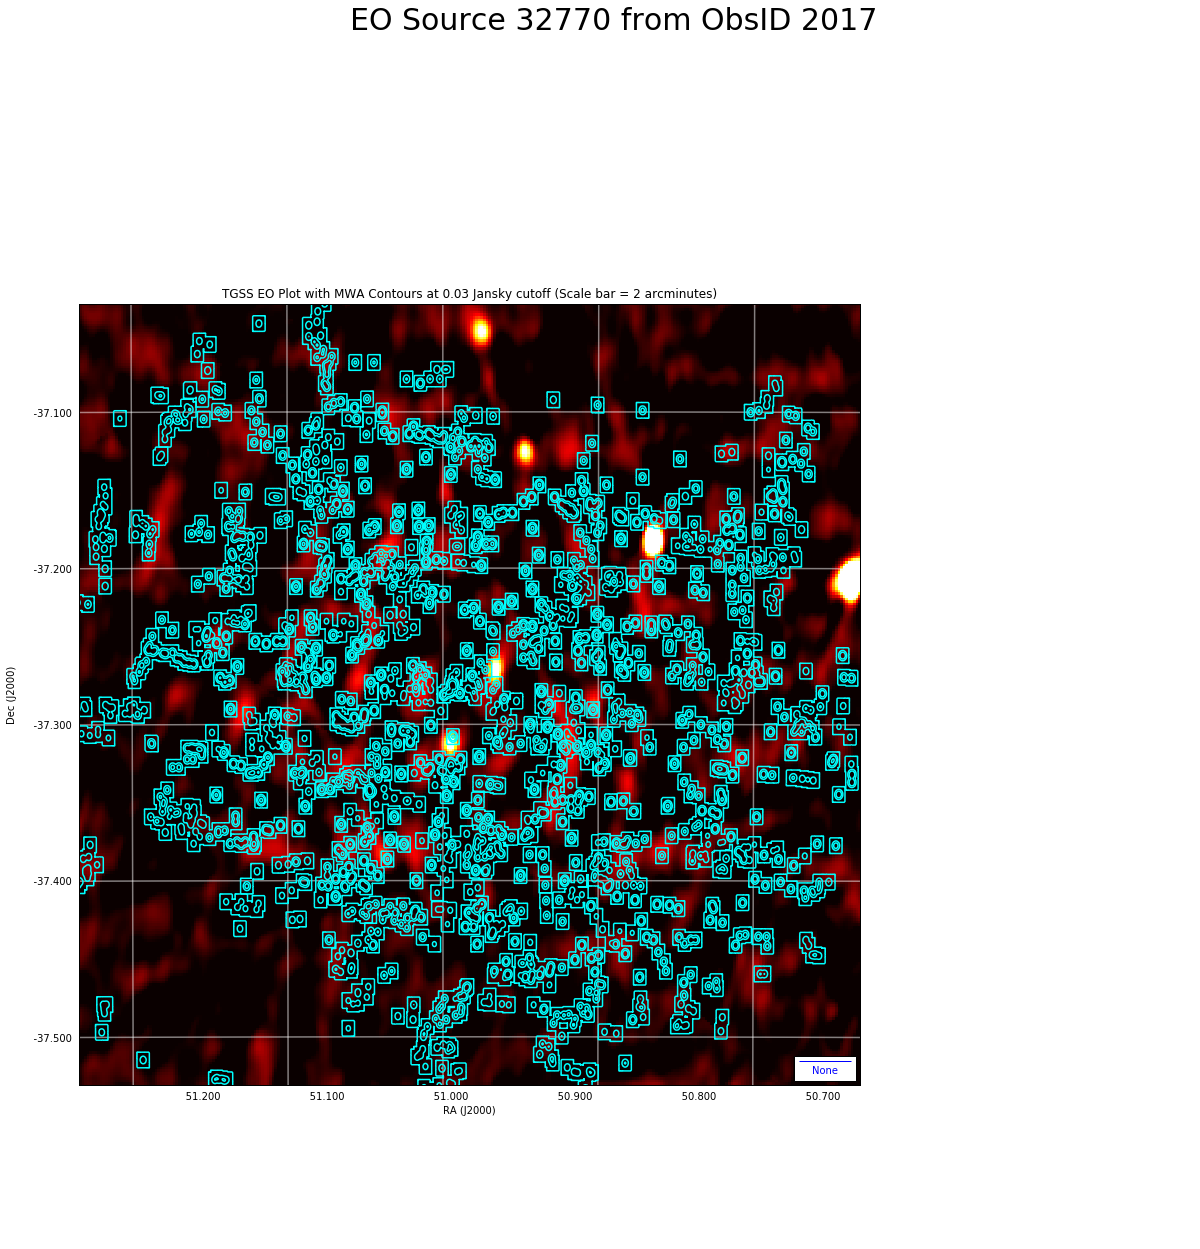

In [9]:
contourFileTGSS = ff.contourFits(data,fitsTGSS,32770,'32770_contours_TGSS.png')

print contourFileTGSS

Congratulations! You now have a .png file of this image. 

Now, lets check this object against NVSS. To do this, simply run downloadTGSS
as you did before, but include the argument NVSS=True, to get the FITS image 
file. From there, run contourFile with this FITS file.



EOID32770_RA50.9784660339_DEC-37.2810325623_NVSS.fits
INFO: Auto-setting vmax to  2.379e-02 [aplpy.core]



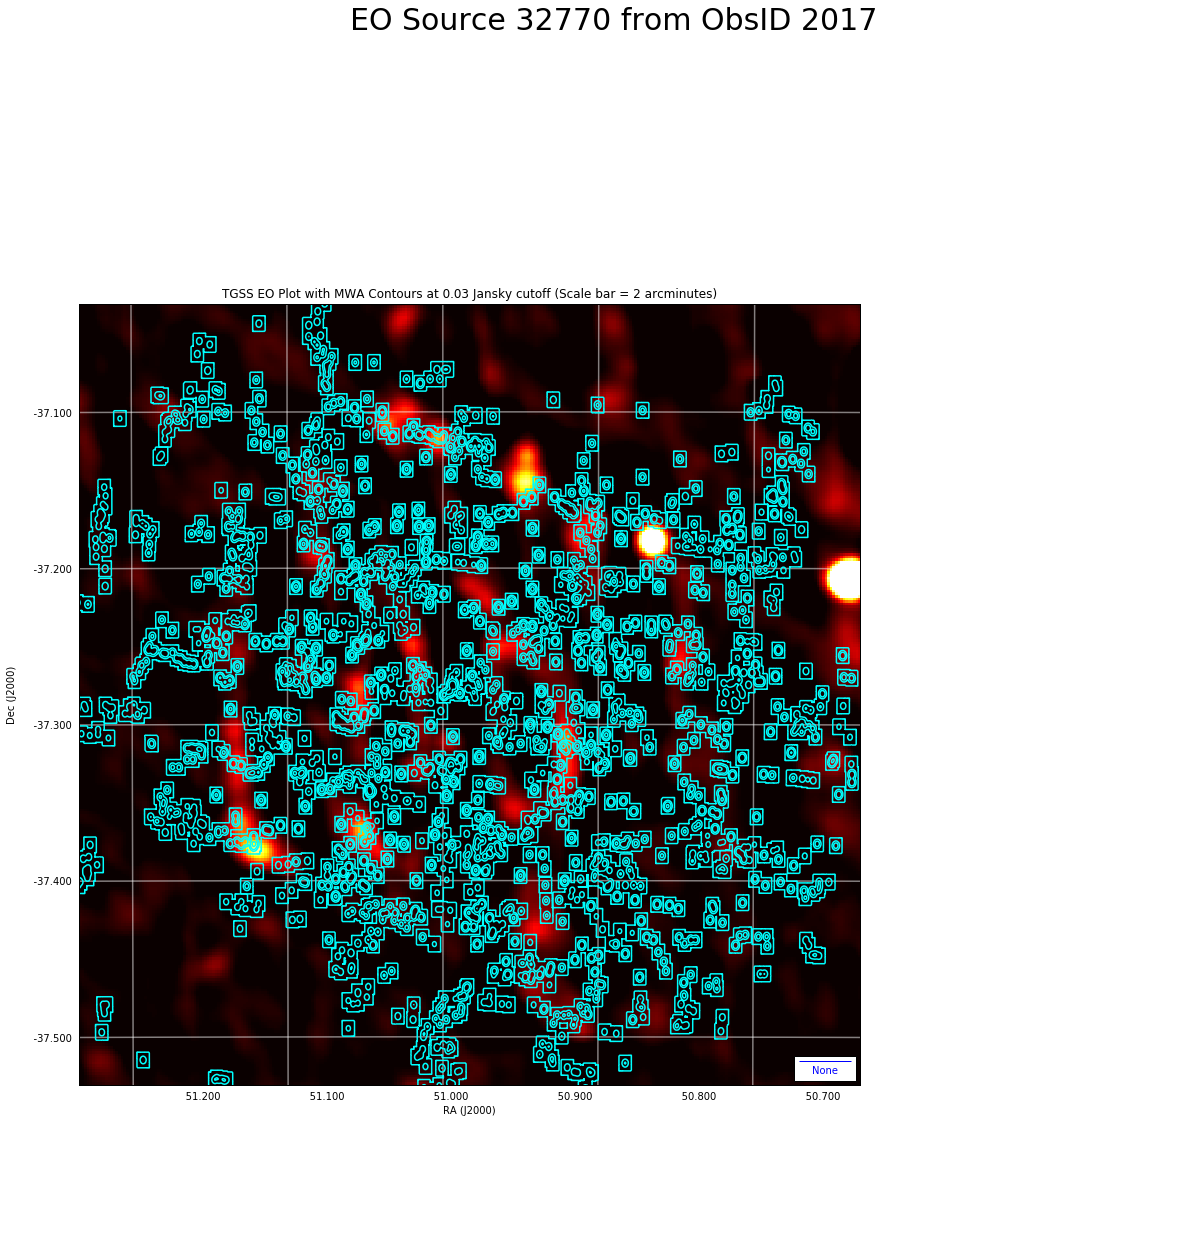

In [12]:
fitsNVSS = ff.downloadTGSS(data,32770,NVSS=True,)
print fitsNVSS

contourFileNVSS = ff.contourFits(data,fitsNVSS,32770,'32770_contours_NVSS.png')
print 

If you want to see the plots when clustering has been applied to the file,
then include the argument cluster=True. The default flux cutoff for this is 
0.03 janskies, but if you would like to change this value (to 0.02 janskies,
for example), then include the argument cutoff=0.02.

In [13]:
contourFileTGSScutoff = ff.contourFits(data,fitsTGSS,32770,
                                       '32770_contours_TGSS_cutoff.png',cluster=True,cutoff=0.02)

AttributeError: 'module' object has no attribute 'modeler'

# getFits

Last function! If you want to make a binary FITS file out of data that has had some clustering
done to it, use getFits. First, make a list of all of the EOids of the EO's that you would like 
clustered:

In [14]:
EOlist = [32770,32772,32808]

Now plug this in to the argument EOidList

In [15]:
someCutsFits = ff.getFits(data,EOidList=EOlist,filename='practice.FITS')

AttributeError: 'module' object has no attribute 'modeler'